<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Feature_Engineering_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv


--2020-09-08 04:12:08--  https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_dataset.csv’

titanic_dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.009s  

2020-09-08 04:12:08 (6.71 MB/s) - ‘titanic_dataset.csv’ saved [61194/61194]



In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


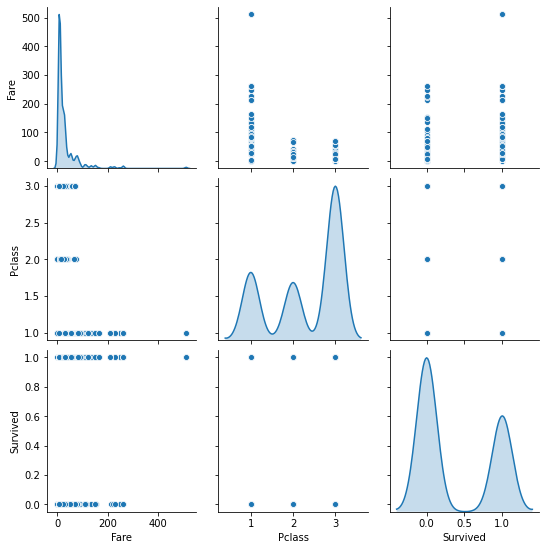

In [7]:
sns.pairplot(df[["Fare", "Pclass", "Survived"]], diag_kind="kde");

Handling Numerical Values

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df=df.drop(columns=['Cabin'])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Filling Categorical Columns Null Values

In [9]:
df['Embarked']=df['Embarked'].fillna('Others')

Removing Unwanted Columns

In [10]:
print("Name Column",len(df['Name'].unique()))
print("Ticket Column",len(df['Ticket'].unique()))
print("PassengerID Column",len(df['PassengerId'].unique()))

Name Column 891
Ticket Column 681
PassengerID Column 891


In [11]:
df=df.drop(columns=['Name','Ticket','PassengerId'])
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Data Normalization

Converting Categorical Columns

In [12]:
ordinalencoder=OrdinalEncoder()
df[['Embarked','Sex']]=ordinalencoder.fit_transform(df[['Embarked','Sex']])
df[['Embarked','Sex']]

,Embarked,Sex
0,3.0,1.0
1,0.0,0.0
2,3.0,0.0
3,3.0,0.0
4,3.0,1.0
...,...,...
886,3.0,1.0
887,3.0,0.0
888,3.0,0.0
889,0.0,1.0


Normalizing Numerical Columns

In [13]:
standardccaler=StandardScaler()
df[['Pclass','Age','SibSp','Parch','Fare']]=standardccaler.fit_transform(df[['Pclass','Age','SibSp','Parch','Fare']])
df[['Pclass','Age','SibSp','Parch','Fare']]

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,0.827377,0.000000,0.432793,2.008933,-0.176263
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


Splitting Data

In [14]:
y=df.pop('Survived')
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.05, random_state=42)

In [15]:
lgbmclassifier = LGBMClassifier()
lgbmclassifier.fit(X_train,y_train,categorical_feature=['Embarked','Sex'])

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Embarked', 'Sex']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
predictions=lgbmclassifier.predict(X_val)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0])

In [17]:
print(classification_report(predictions,y_val))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.78      0.88      0.82        16

    accuracy                           0.87        45
   macro avg       0.85      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

